In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
df = pd.read_csv('data/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [3]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [4]:
df.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [5]:
df.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [6]:
# Dropping NA and duplicates
def dataframe_cleanup(df):
    df = df.dropna()
    df = df.drop_duplicates()
    df = df.drop(labels=['team_name', 'team_id'], axis='columns')
    return df

#### Change the matchup column.
when they play away court, there is an @. Change it to away/home

In [7]:
def change_matchup(df):
    df['matchup'] = df['matchup'].apply(lambda x: str('away') if '@' in x else str('home'))
    return df

In [8]:
print(df.minutes_remaining.max())
print(df.seconds_remaining.max())

11
59


From the maximum values of seconds and minutes we observe that it shows at what moment the shot was taken. Unfortunatelly we don't have information in which quarter the shot is taken.
Games in the NBA have a 12 quareter length. We can merge these two columns as time_remaining.
We will transfer the minutes left in seconds

**It will be useful to see the shots taken in the last seconds of the quareter in order to see how 'clutch' Kobe was**
Unfortunately we don't have data for the 24 second shot-clock.

In [10]:
def time_feature(df):
    df['time_remaining'] = df['minutes_remaining']*60 + df['seconds_remaining']
    df.drop(['minutes_remaining', 'seconds_remaining'], axis=1, inplace=True)
    return df

In [11]:
def initial_feature_engineering(df):
    """
    Perform initial feature engineering and data cleanup.
    The returned dataframe will be used for some initial data analytics
    :param df: input dataframe
    :return: copy of the input dataframe with all the modifications
    """
    df_new = df.copy(deep=True)
    df_new = dataframe_cleanup(df_new)
    df_new = change_matchup(df_new)
    df_new = time_feature(df_new)
    return df_new


In [53]:
df = initial_feature_engineering(df)

#### Shot location
These columns mainly give us information of the location of the shot.
Notice that there is only a 3PT and 2PT shot type. There is no Free Throw.

Every player has its sweet spot where he shoots better. Some players are better three point shooters, some shoot better from mid-range, some from the corner. It will be important to analyze the efficiency on every location

In [13]:
df[['shot_type', 'shot_zone_area','shot_zone_basic', 'shot_zone_range']]

,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range
1,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.
2,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.
3,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.
4,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.
5,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.
...,...,...,...,...
30691,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.
30692,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.
30694,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.
30695,3PT Field Goal,Center(C),Above the Break 3,24+ ft.


In [14]:
df.shot_type.value_counts()

2PT Field Goal    20285
3PT Field Goal     5412
Name: shot_type, dtype: int64

In [15]:
df.combined_shot_type.value_counts()

Jump Shot    19710
Layup         4532
Dunk          1056
Tip Shot       152
Hook Shot      127
Bank Shot      120
Name: combined_shot_type, dtype: int64

### Analyzing the shots:
We see that there is a very high shot efficiency when the player is dunking the ball in any type of action
#### TODO: better visualize this

Action type is the type of shot that led to shoot. We see that we mostly have Jump Shots and Layups

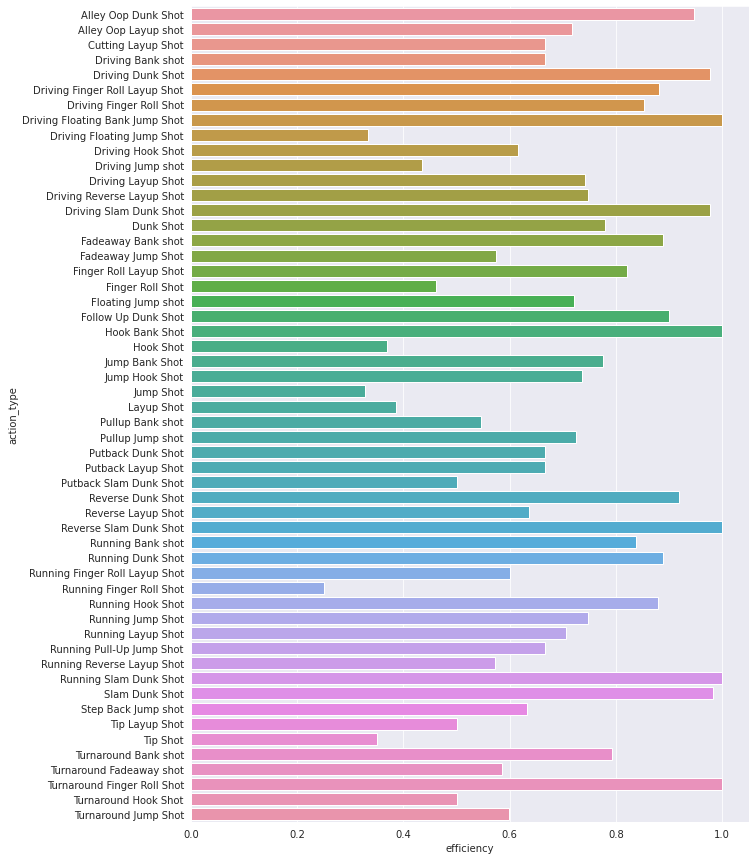

In [16]:
shots = df.groupby(['action_type'])['shot_made_flag'].value_counts(normalize=True).reset_index(name="efficiency")
shots_cleaned = shots[shots['shot_made_flag'] == 1.0][['action_type', 'efficiency']]
plt.figure(figsize=(10,15))
# todo order
ax = sns.barplot(data=shots_cleaned, x='efficiency', y='action_type', orient='h')

# Questions we want to answer
How does the shooting efficiency change:
- during every season.
- by time left
- by distance
- by minutes remaining in each quarter.
- versus playing with different teams
- in the playofs

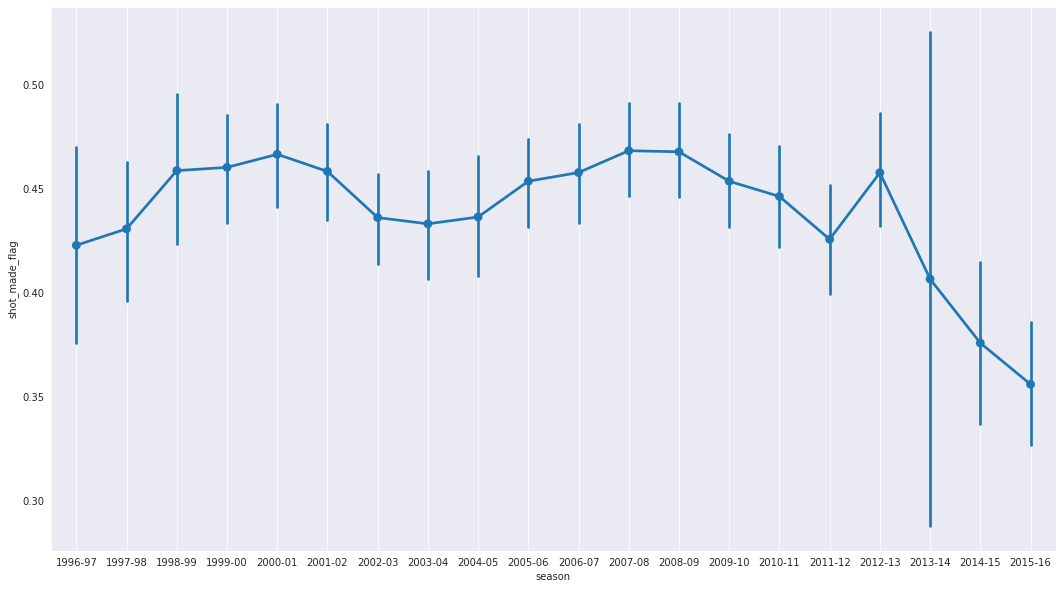

In [17]:
plt.figure(figsize=(18, 10))
ax = sns.pointplot(x='season', y='shot_made_flag', data=df, order=sorted(list(df['season'].unique())))
ax.grid()


## Shooting playoff vs regular season
We notice that in most cases the shooting decreases in playoff

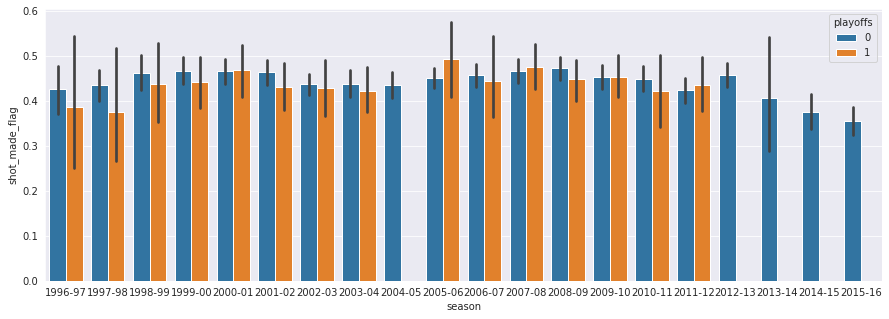

In [18]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='season', y='shot_made_flag', hue='playoffs',data=df, order=sorted(list(df['season'].unique())))


## Shot efficiency by time left
for each period get the shot efficiency by time
We see that as the remaining time decreases, the shot efficiency is decreasing.

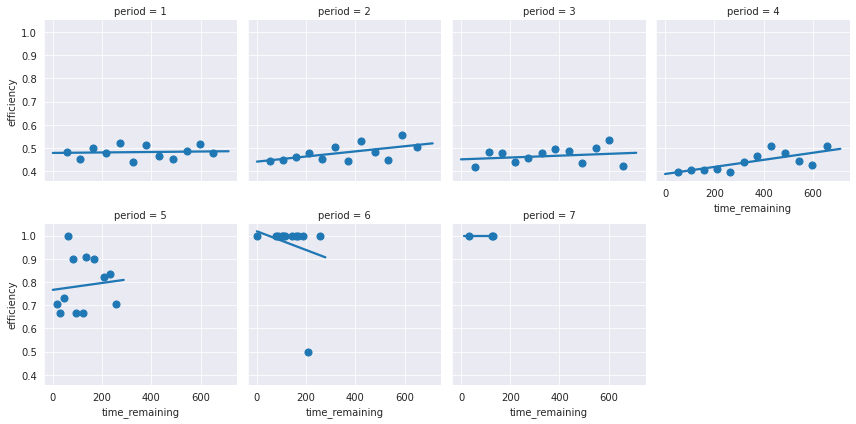

In [19]:
shot_period = df.groupby(['period', 'time_remaining'])['shot_made_flag'].value_counts(normalize=True).reset_index(name="efficiency")
shot_period = shot_period[shot_period['shot_made_flag'] == 1.0][['period', 'time_remaining', 'efficiency']]

g = sns.FacetGrid(shot_period, col="period", col_wrap=4)
g.map(sns.regplot,'time_remaining', 'efficiency', data=shot_period, x_bins=12, ci=None)

# Versus teams
Variance is high for teams like BKN and VAN as they are new/old franchises.

<AxesSubplot:xlabel='opponent', ylabel='shot_made_flag'>

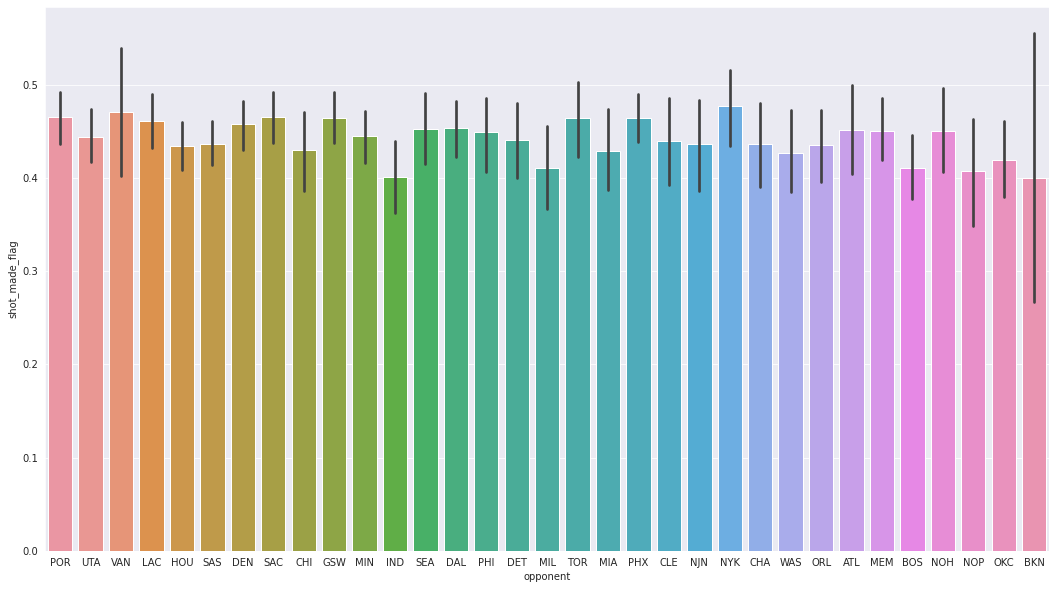

In [20]:
plt.figure(figsize=(18, 10))
sns.barplot(x='opponent', y='shot_made_flag', data=df)

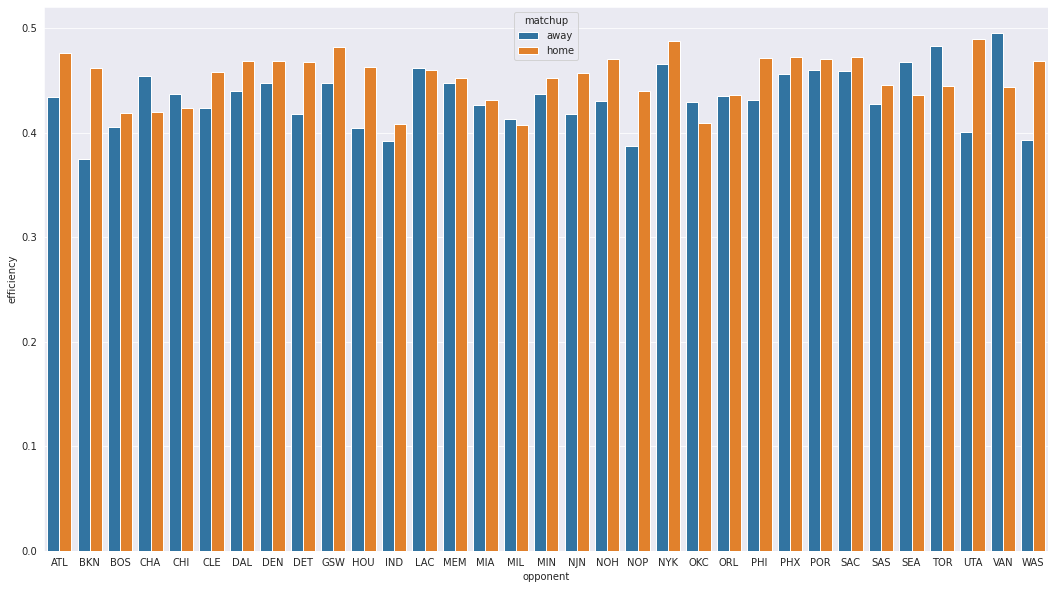

In [21]:
# shot_period = df.groupby(['period', 'time_remaining'])['shot_made_flag'].value_counts(normalize=True).reset_index(name="efficiency")
# shot_period = shot_period[shot_period['shot_made_flag'] == 1.0][['period', 'time_remaining', 'efficiency']]
shot_team_home = df.groupby(['opponent', 'matchup'])['shot_made_flag'].value_counts(normalize=True).reset_index(name='efficiency')
shot_team_home = shot_team_home[shot_team_home['shot_made_flag'] == 1.0][['opponent', 'matchup', 'efficiency']]

plt.figure(figsize=(18, 10))
sns.barplot(x='opponent', y='efficiency', hue='matchup', data=shot_team_home)
del shot_team_home

/home/filip/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


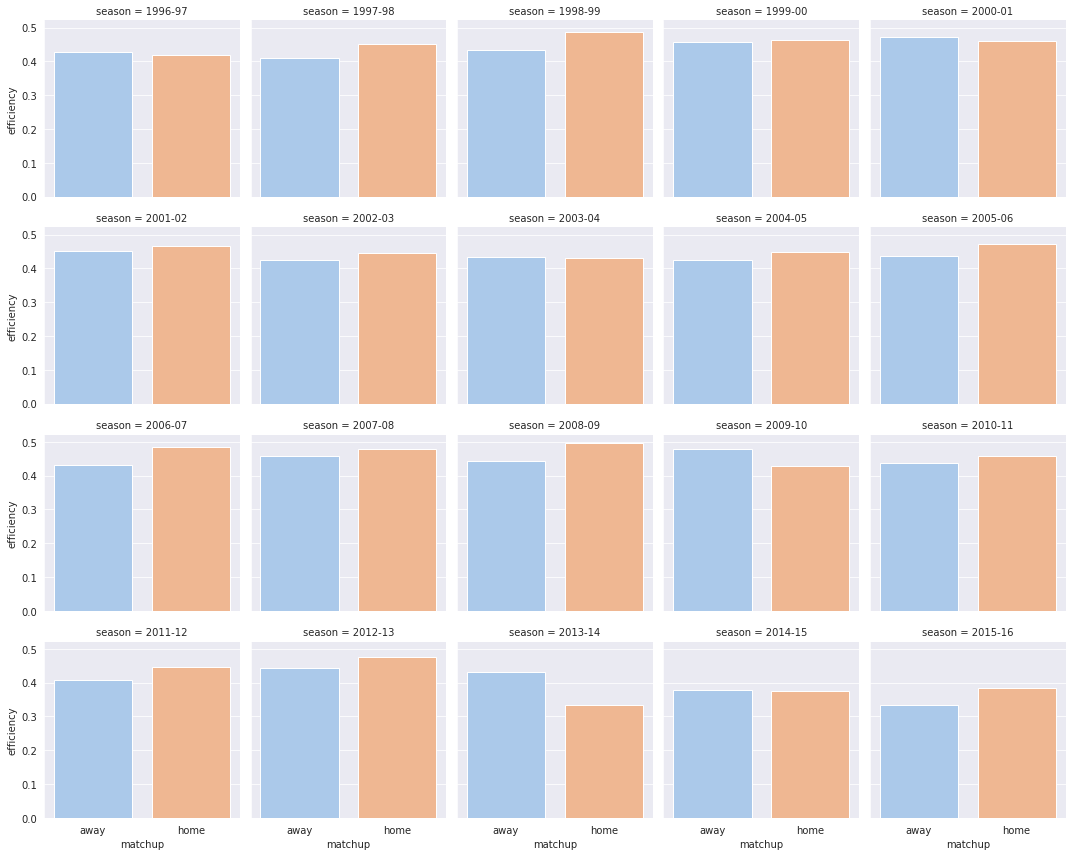

In [22]:
shot_team_home = df.groupby(['season', 'matchup'])['shot_made_flag'].value_counts(normalize=True).reset_index(name='efficiency')
shot_team_home = shot_team_home[shot_team_home['shot_made_flag'] == 1.0][['season', 'matchup', 'efficiency']]

g = sns.FacetGrid(shot_team_home, col="season", col_wrap=5)
g.map(sns.barplot,'matchup', 'efficiency', data=shot_team_home, palette='pastel')

(0.4, 0.5)

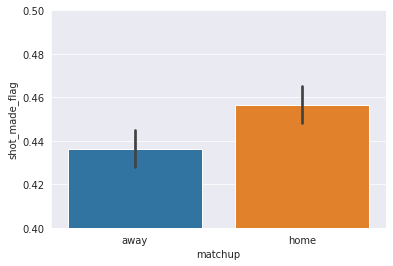

In [23]:
sns.barplot(x='matchup', y='shot_made_flag', data=df )
plt.ylim(0.4, 0.5)

Three point vs two point

<AxesSubplot:xlabel='season', ylabel='efficiency'>

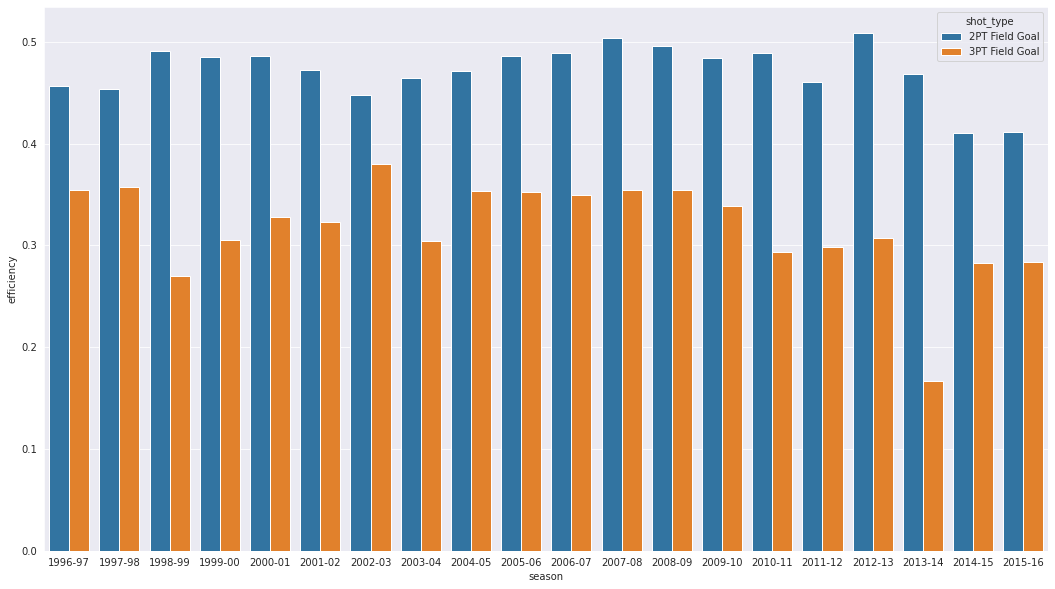

In [24]:
plt.figure(figsize=(18, 10))

shot_23 = df.groupby(['season', 'shot_type'])['shot_made_flag'].value_counts(normalize=True).reset_index(name='efficiency')
shot_23 = shot_23[shot_23['shot_made_flag'] == 1.0][['season', 'shot_type', 'efficiency']]
sns.barplot(data=shot_23, x='season', y='efficiency', hue='shot_type')

# Shot zoness

<AxesSubplot:xlabel='loc_x', ylabel='loc_y'>

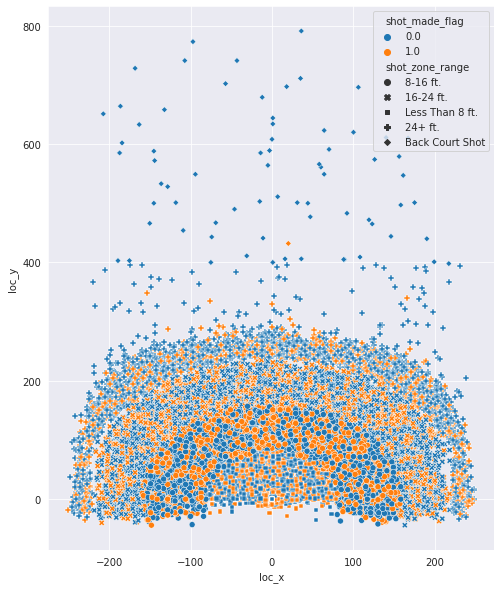

In [25]:
plt.figure(figsize=(8, 10))

sns.scatterplot(data=df, x='loc_x', y='loc_y', hue='shot_made_flag', style='shot_zone_range')

In [26]:
def plot_zone_wise(zone_name):
    c_mean = df.groupby(zone_name)['shot_made_flag'].mean()
    plt.figure(figsize=(15,15))
    for i, area in enumerate(df[zone_name].unique()):
        plt.subplot(121)
        c = df.loc[(df[zone_name]==area)]
        plt.scatter(c.loc_x, c.loc_y,alpha=1)
        plt.text(c.loc_x.mean(), c.loc_y.quantile(0.80), '%0.3f'%(c_mean[area]),size=15, bbox=dict(facecolor='red', alpha=0.5))
        plt.ylim(-100, 900)
    plt.legend(df[zone_name].unique())
    plt.title(zone_name)
    plt.show()

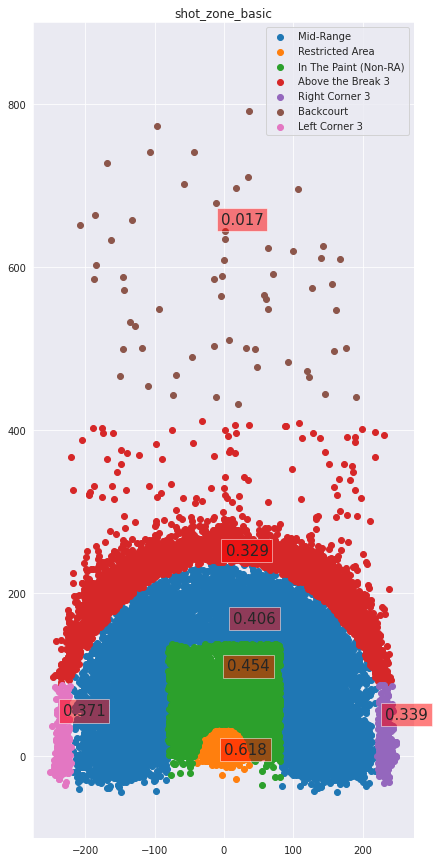

In [27]:
plot_zone_wise('shot_zone_basic')

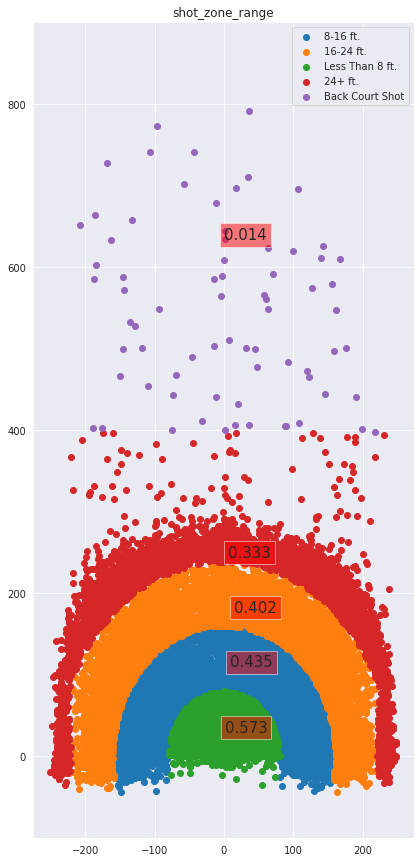

In [28]:
plot_zone_wise('shot_zone_range')

In [29]:
plot_zone_wise('shot_zone_area')a['Dunk']

SyntaxError: invalid syntax (3771049570.py, line 1)

<AxesSubplot:xlabel='shot_distance'>

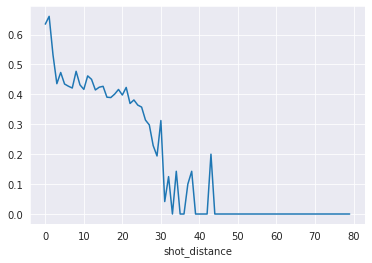

In [30]:
df.groupby('shot_distance')['shot_made_flag'].mean().plot(kind='line')

# Feature engineering

Get the average value per season and perform a +/-

In [31]:
def generate_points_from_game(df):
    """
    From a given game, count the number of points the player has shot.
    :param df: dataframe
    :param game_id: id of one game
    :return: dataframe with 'points' column
    """
    df['points'] = ""

    for game_id in df.game_id.unique():
        points = int(sum(df[df.game_id == game_id]['shot_made_flag'] * df[df.game_id == game_id].apply(lambda x: 2 if x['shot_type'] == '2PT Field Goal' else 3, axis=1)))
        df.loc[df['game_id'] == game_id, 'points'] = points

    return df

In [32]:
def generate_average_per_season(df):
    """
    From a given season, find the average shots taken by a player
    :param df: dataframe
    :param season: season ex. 2002-03
    :return: dataframe with 'season_avg' column
    """
    df['season_avg'] = ""

    for season in df.season.unique():
        points_avg = round(df.loc[df.season == season, ['game_id', 'points']].drop_duplicates()['points'].mean(),2)
        df.loc[df['season'] == season, 'season_avg'] = points_avg

    return df

In [33]:
def generate_plus_minus_per_season(df):
    """
    For each game, find the difference between the points made during that game and the season average
    :param df: dataframe
    :param season: season, ex. 2002-03
    :return: dataframe with 'plus-minus' column
    """
    df['plus_minus'] = df['points'] - df['season_avg']
    return df

Shooting performance FG

In [34]:
def field_goal_percentage(df):
    """
    For a given game get the field goal percentage (percentage of successfull shots)
    :param df: dataframe
    :param game_id: id of one game
    :return: dataframe with 'FGP' shot
    """
    df['FGP'] = ""

    for game_id in df.game_id.unique():
        FGP = round(df[df.game_id == game_id]['shot_made_flag'].mean(),3)
        df.loc[df['game_id'] == game_id, 'FGP'] = FGP

    return df

Extracting the month, players shoot differently depending on the month

In [35]:
def extract_month(df):
    """
    Extract the month from the datetime format.
    :param df: dataframe
    :return: modified df with the month feature
    """
    df['month'] = df.game_date.apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").month)
    return df


In [36]:
# get points scored per game
# shot_type = '2PT Field Goal'
# shot_made_flag 1.0 0.0
# df[df.game_id == 20000012].apply(lambda x: x['shot_type'], axis=1)

def feature_engineering(df):
    """
    Do the feature engineering on the dataframe
    :param df: original dataset
    :return: copy of the original but with modificaiton.
    """
    df_new = df.copy(deep=True)
    df_new = generate_points_from_game(df_new)
    df_new = generate_average_per_season(df_new)
    df_new = generate_plus_minus_per_season(df_new)
    df_new = field_goal_percentage(df_new)
    df_new = extract_month(df_new)
    return df_new

In [54]:
df = feature_engineering(df)

In [38]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,period,playoffs,...,game_date,matchup,opponent,shot_id,time_remaining,points,season_avg,plus_minus,FGP,month
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,1,0,...,2000-10-31,away,POR,2,622,8,18.26,-10.26,0.444,10
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,1,0,...,2000-10-31,away,POR,3,465,8,18.26,-10.26,0.444,10
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,1,0,...,2000-10-31,away,POR,4,412,8,18.26,-10.26,0.444,10
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,2,0,...,2000-10-31,away,POR,5,379,8,18.26,-10.26,0.444,10
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,3,0,...,2000-10-31,away,POR,6,572,8,18.26,-10.26,0.444,10


<AxesSubplot:xlabel='season', ylabel='FGP'>

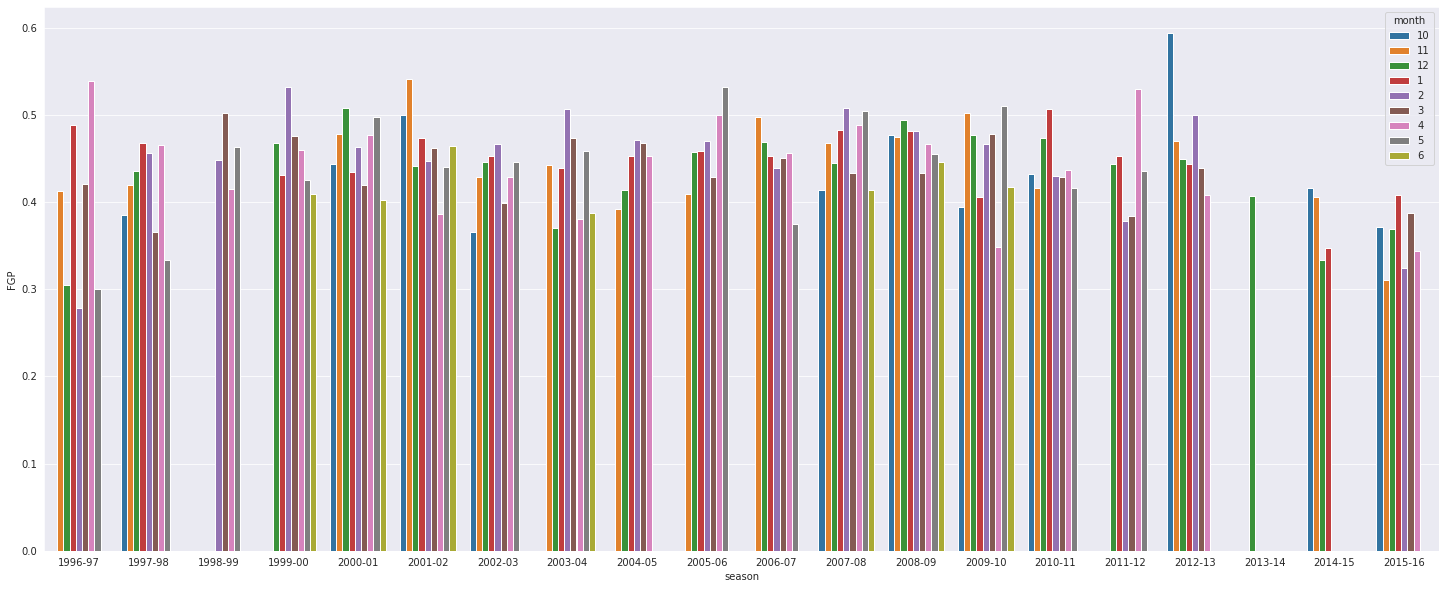

In [39]:
plt.figure(figsize=(25,10))
df_fgp = df.groupby(['season', 'month'])['FGP'].mean().reset_index(name='FGP')
sns.barplot(data=df_fgp, x='season', y='FGP', hue='month',ci=None, hue_order=[10,11,12,1,2,3,4,5,6])

FGP per game in a season

/home/filip/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/filip/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


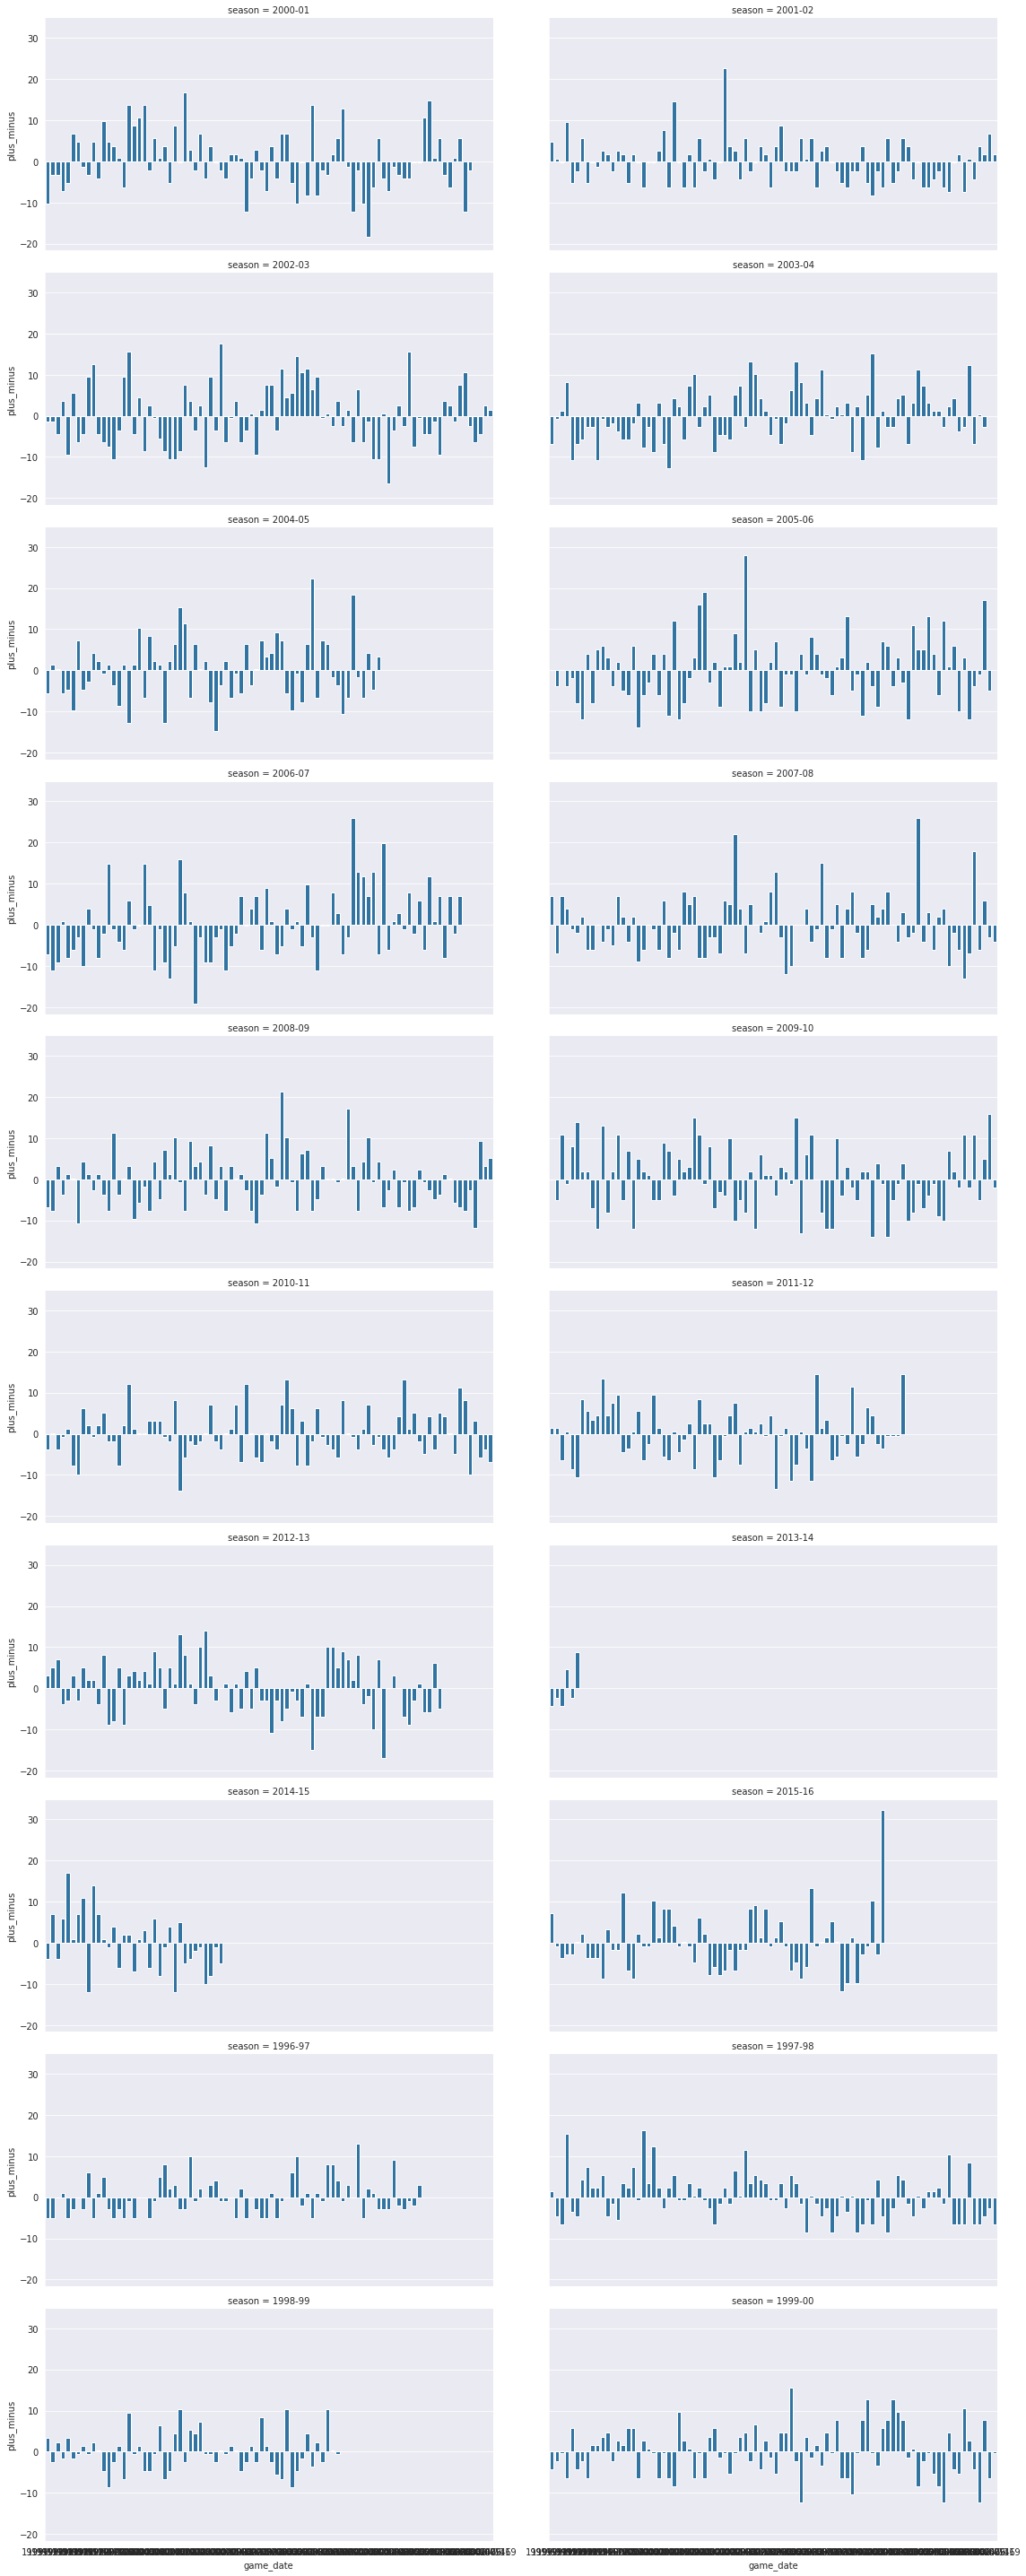

In [40]:
df_pm = df[['season', 'plus_minus', 'game_date']].drop_duplicates()
g = sns.FacetGrid(df_pm, col="season", col_wrap=2, size=4, aspect=2)
g.map(sns.barplot,'game_date', 'plus_minus', data=df_pm)

# Preparing modeling
From the analyzed and preprocessed data, we continue the pre-processing in order to prepare it for the modeling phase

In [41]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,period,playoffs,...,game_date,matchup,opponent,shot_id,time_remaining,points,season_avg,plus_minus,FGP,month
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,1,0,...,2000-10-31,away,POR,2,622,8,18.26,-10.26,0.444,10
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,1,0,...,2000-10-31,away,POR,3,465,8,18.26,-10.26,0.444,10
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,1,0,...,2000-10-31,away,POR,4,412,8,18.26,-10.26,0.444,10
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,2,0,...,2000-10-31,away,POR,5,379,8,18.26,-10.26,0.444,10
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,3,0,...,2000-10-31,away,POR,6,572,8,18.26,-10.26,0.444,10


In [46]:
# def convert_matchup(df):
#     df['isHome'] = df.matchup.apply(lambda x: 1 if  x=="home" else 0)
#     df = df.drop(['matchup'], axis=1)
#     return df
# df = convert_matchup(df)

In [47]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,period,playoffs,...,game_date,opponent,shot_id,time_remaining,points,season_avg,plus_minus,FGP,month,isHome
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,1,0,...,2000-10-31,POR,2,622,8,18.26,-10.26,0.444,10,0
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,1,0,...,2000-10-31,POR,3,465,8,18.26,-10.26,0.444,10,0
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,1,0,...,2000-10-31,POR,4,412,8,18.26,-10.26,0.444,10,0
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,2,0,...,2000-10-31,POR,5,379,8,18.26,-10.26,0.444,10,0
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,3,0,...,2000-10-31,POR,6,572,8,18.26,-10.26,0.444,10,0


In [49]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return res

In [50]:
def one_hot_encoding(df):
    df_new = df.copy(deep=True)
    features_to_encode = ['combined_shot_type', 'season', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'opponent', 'action_type', 'matchup']
    for feature in features_to_encode:
        df_new = encode_and_bind(df_new, feature)

    return df_new

In [55]:
dfk = one_hot_encoding(df)

In [56]:
dfk.head()

,game_event_id,game_id,lat,loc_x,loc_y,lon,period,playoffs,shot_distance,shot_made_flag,...,action_type_Step Back Jump shot,action_type_Tip Layup Shot,action_type_Tip Shot,action_type_Turnaround Bank shot,action_type_Turnaround Fadeaway shot,action_type_Turnaround Finger Roll Shot,action_type_Turnaround Hook Shot,action_type_Turnaround Jump Shot,matchup_away,matchup_home
1,12,20000012,34.0443,-157,0,-118.4268,1,0,15,0.0,...,0,0,0,0,0,0,0,0,1,0
2,35,20000012,33.9093,-101,135,-118.3708,1,0,16,1.0,...,0,0,0,0,0,0,0,0,1,0
3,43,20000012,33.8693,138,175,-118.1318,1,0,22,0.0,...,0,0,0,0,0,0,0,0,1,0
4,155,20000012,34.0443,0,0,-118.2698,2,0,0,1.0,...,0,0,0,0,0,0,0,0,1,0
5,244,20000012,34.0553,-145,-11,-118.4148,3,0,14,0.0,...,0,0,0,0,0,0,0,0,1,0
